# CSMODEL Project - Case Study
In this Notebook, we will be discussing and exploring the dataset about [Diabetes](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset/data) taken from the website Kaggle.

This dataset, sourced from the National Institute of Diabetes and Digestive and Kidney Diseases, aims to predict the presence of diabetes in patients using specific diagnostic measurements found in the dataset. It's important to note that the dataset was carefully curated, with specific criteria in mind. All the individuals included are female, at least 21 years of age, and of Pima Indian heritage.

**Members:**

Argamosa, Daniel Cedric (S12)

Donato, Adriel Joseph (S13)

Srivastava, Naman (S13)

## Dataset Collection Process and Implications
The dataset was gathered from the Pima Indian population near Phoenix, Arizona, a community under continuous study by the National Institute of Diabetes and Digestive and Kidney Diseases since 1965 due to its high incidence of diabetes. This dataset exclusively focuses on female individuals of at least 21 years of age who are of Pima Indian heritage, adhering to specific selection criteria. Now, the study that used this dataset employed a longitudinal approach, conducting standardized examinations every two years, which included an oral glucose tolerance test to diagnose diabetes. Diagnosis followed World Health Organization Criteria, ensuring clinical confirmation of diabetes cases. The dataset's thorough validation process establishes it as a reliable resource for investigating the prediction of diabetes onset over time.

Now, in terms of the possible implications this might have for the conclusions and insights there are a few. First, the dataset exclusively focuses on female individuals of Pima Indian heritage. Therefore, insights drawn from this dataset may not be generalizable to other populations. The findings would apply specifically to this demographic group. Second, the strict diagnostic criteria for diabetes diagnosis ensure that the individuals included in the dataset are accurately diagnosed cases, enhancing the reliability of the data for research purposes. Third, the dataset's age range restriction may limit its applicability to younger age groups. Lastly, the influence of Pima Indian heritage introduces genetic and cultural factors that may not be present to the same extent in other populations, further emphasizing the need for caution when extending conclusions beyond this specific demographic.

## The Dataset
The dataset `diabetes` has **768 participating female individuals** (rows) and has several variables (columns) related to them, some of them are independent (several medical predictor variables) and only one target dependent variable (Outcome). 

If you view the `.csv` file in Excel, you can see that our dataset contains many observations across **9 variables**. The following are the descriptions of each variable in the dataset:

- **`Pregnancies`**: To express the Number of pregnancies
- **`Glucose`**: To express the Glucose level in blood
- **`BloodPressure`**: To express the Blood pressure measurement (mm Hg)
- **`SkinThickness`**: To express the thickness of the skin (mm)
- **`Insulin`**: To express the Insulin level in blood (mu U/ml) 
- **`BMI`**: To express the Body mass index
- **`DiabetesPedigreeFunction`**: To express the Diabetes percentage
- **`Age`**: To express the age
- **`Outcome`**: To express the final result 1 is Yes and 0 is No

### **Imports:**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **General Info:**

In [3]:
df = pd.read_csv('diabetes.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## **Data Cleaning**

Check if the data types are correct:

In [7]:
data_types = df.dtypes
print(data_types)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


Check for any missing values:

In [8]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Check for any duplicate rows:

In [9]:
df.duplicated(keep=False)

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [10]:
df.duplicated().sum()

0

Check if some values are set to a certain default value:

In [11]:
has_zeros = (df == 0).any()
cols = has_zeros[has_zeros].index
print(cols)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Outcome'],
      dtype='object')


- It makes sense for Pregnancies and Outcome to have 0s, but the rest may have it as an error or missing value as stated in the dataset description.

- In order to use Imputation Techniques, checking the distribution for all the vairables that have 0 as it as an error or missing value.

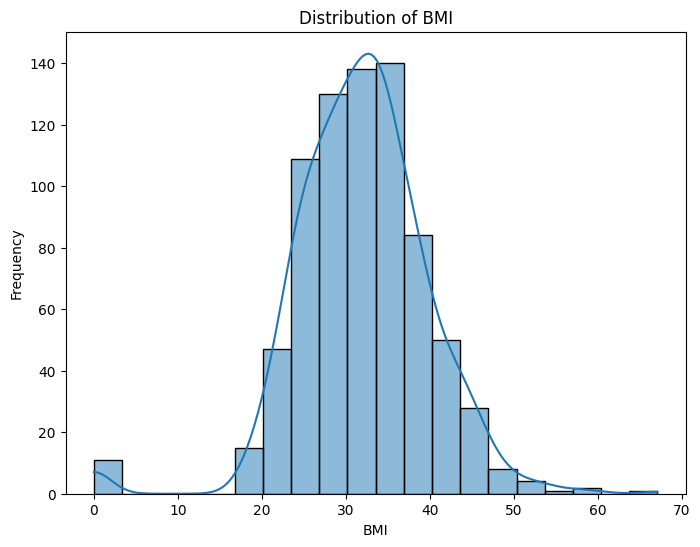

In [12]:
plt.figure(figsize=(8, 6))
sns.histplot(df['BMI'], bins=20, kde=True)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

In [13]:
# The skewness of BMI after removing the 0s
bmi_skewness = df[df['BMI'] != 0]['BMI'].skew()
bmi_skewness

0.5939697505712674

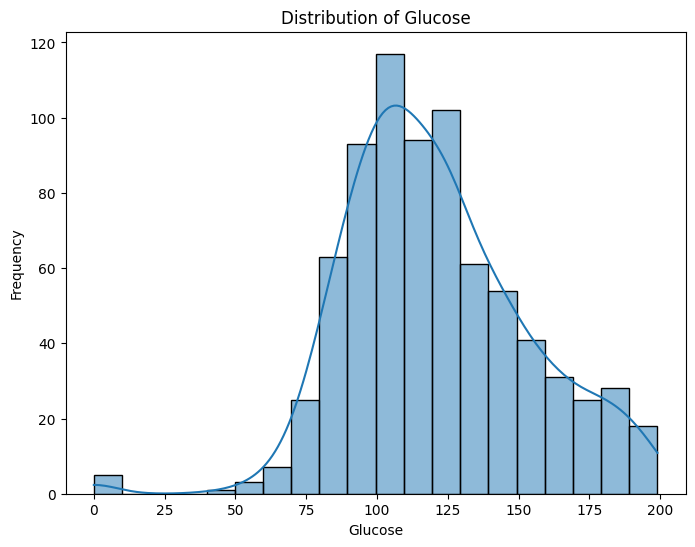

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Glucose'], bins=20, kde=True)
plt.title('Distribution of Glucose')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.show()

In [15]:
# The skewness of Glucose after removing the 0s
glucose_skewness = df[df['Glucose'] != 0]['Glucose'].skew()
glucose_skewness

0.5309885349396284

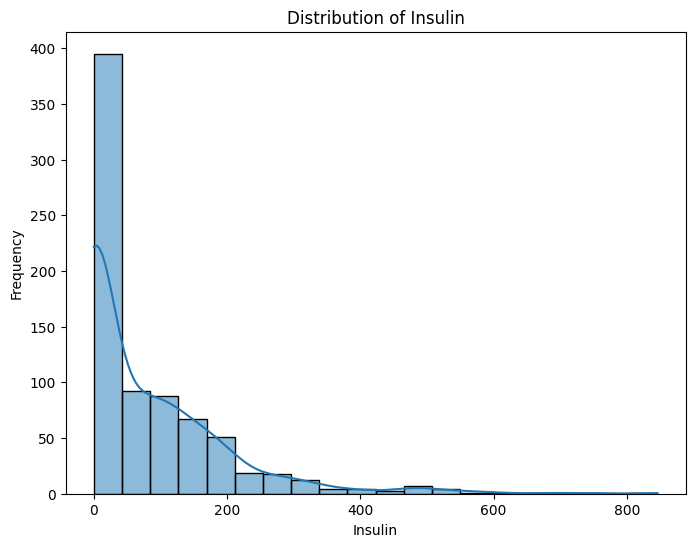

In [16]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Insulin'], bins=20, kde=True)
plt.title('Distribution of Insulin')
plt.xlabel('Insulin')
plt.ylabel('Frequency')
plt.show()

In [17]:
# The skewness of Insulin after removing the 0s
insulin_skewness = df[df['Insulin'] != 0]['Insulin'].skew()
insulin_skewness

2.1664638438124424

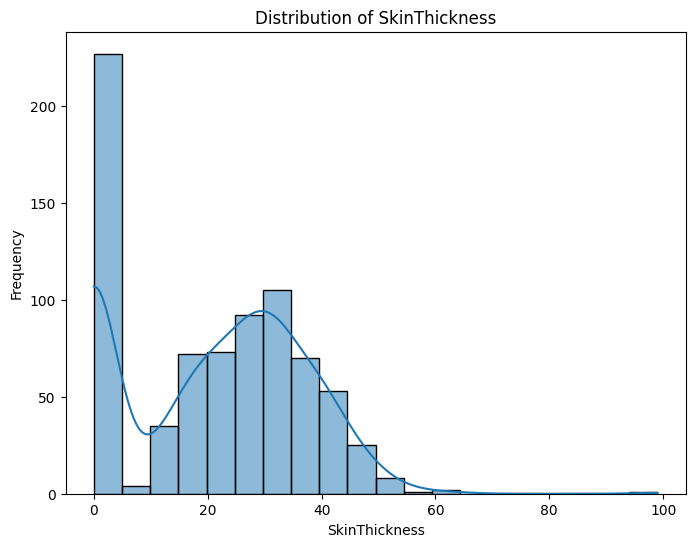

In [18]:
plt.figure(figsize=(8, 6))
sns.histplot(df['SkinThickness'], bins=20, kde=True)
plt.title('Distribution of SkinThickness')
plt.xlabel('SkinThickness')
plt.ylabel('Frequency')
plt.show()

In [19]:
# The skewness of SkinThickness after removing the 0s
st_skewness = df[df['SkinThickness'] != 0]['SkinThickness'].skew()
st_skewness

0.6906190139841921

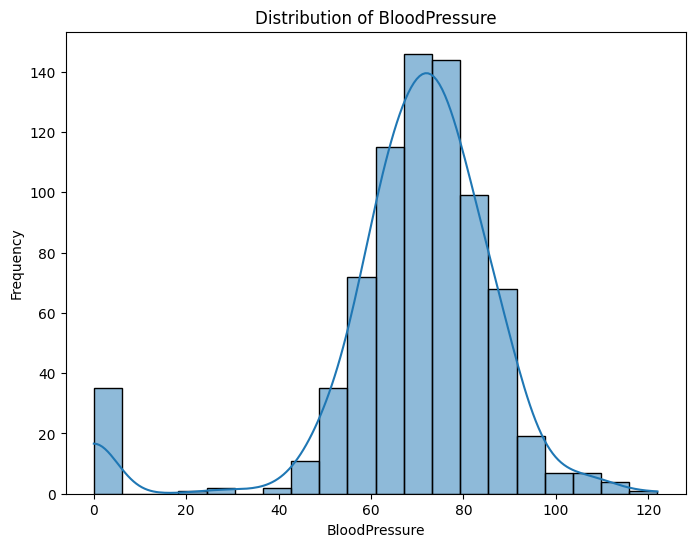

In [20]:
plt.figure(figsize=(8, 6))
sns.histplot(df['BloodPressure'], bins=20, kde=True)
plt.title('Distribution of BloodPressure')
plt.xlabel('BloodPressure')
plt.ylabel('Frequency')
plt.show()

In [21]:
# The skewness of BloodPressure after removing the 0s
bp_skewness = df[df['BloodPressure'] != 0]['BloodPressure'].skew()
bp_skewness

0.13415273171959258

- For BMI and Glucosee the distribution is not normally distributed since their skewness value disregarding 0s are above 0.5, so the values of 0 will be imputated by their respective Median

- Blood Pressure's skewness when the 0s are disregarded is extremely close to 0 and below 0.5, so it's Mean will be used for imputation

- For Insulin and Skin Thickness, due to the large number of 0 values, which may indicate errors or null values in the data, there is option to either remove the rows containing the missing data, impute them using the median considering that their distributions are not normal, or simply drop their column

- The decision that has been made was to drop the Skin Thickness column due to being relevant for the research question and retain the Insulin column by removing entire rows within the data set where there was missing data in the Insulin column

Dropping the Skin Thickness column

In [22]:
df = df.drop('SkinThickness', axis=1)

Removing rows due to missing data in Insulin

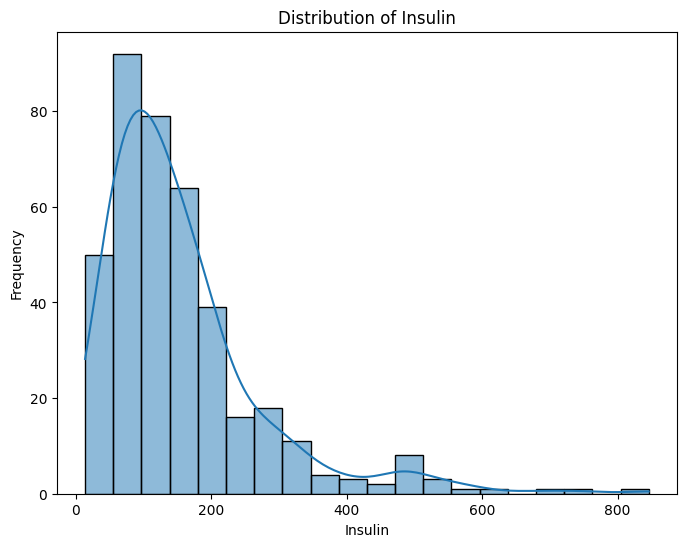

In [23]:
df = df[df['Insulin'] != 0]

plt.figure(figsize=(8, 6))
sns.histplot(df['Insulin'], bins=20, kde=True)
plt.title('Distribution of Insulin')
plt.xlabel('Insulin')
plt.ylabel('Frequency')
plt.show()

Replace values of 0 for Median values:

In [24]:
filtered_df = df[df['BMI'] != 0] # Not counting the values of 0 for finding the Median
median_bmi = filtered_df['BMI'].median()
df['BMI'] = df['BMI'].replace(0, median_bmi)

In [25]:
filtered_df = df[df['Glucose'] != 0]
median_Glucose = filtered_df['Glucose'].median()
df['Glucose'] = df['Glucose'].replace(0, median_Glucose)

In [26]:
filtered_df = df[df['BloodPressure'] != 0]
mean_BloodPressure = filtered_df['BloodPressure'].mean()
df['BloodPressure'] = df['BloodPressure'].replace(0, mean_BloodPressure)

In [27]:
df.describe()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.286802,122.606599,70.654822,155.548223,33.072843,0.525543,30.814721,0.329949
std,3.209635,30.783576,12.469919,118.775855,7.015007,0.350127,10.198971,0.470792
min,0.000000,56.000000,24.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,76.250000,28.400000,0.270250,23.000000,0.000000
50%,2.000000,119.000000,70.000000,125.000000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,190.000000,37.075000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## **Exploratory Data Analysis (EDA)**

- Identify at least 4 exploratory data analysis questions. Properly state the questions in the notebook. Having more than 4 questions is acceptable, especially if this will help in understanding the data better.
- Answer the EDA questions using both:
    - Numerical Summaries – measures of central tendency, measures of dispersion, and correlation
    - Visualization – Appropriate visualization should be used. Each visualization should be accompanied by a brief explanation.

###   Is there a relationship of `Glucose` and `Insulin`, in regards to the `BMI`?

To answer this question, the variables of interest are:
- **`Glucose`**: Glucose levels in blood
- **`Insulin`**: Insulin levels in blood
- **`BMI`**: Body Mass Index of an individual

Relationship between BMI and Glucose:

In [28]:
# Display Columns
glucose_bmi = df[['Glucose', 'BMI']]
glucose_bmi

,Glucose,BMI
3,89,28.1
4,137,43.1
6,78,31.0
8,197,30.5
13,189,30.1
...,...,...
753,181,43.3
755,128,36.5
760,88,28.4
763,101,32.9


In [29]:
# Display Measures of Central Tendency and Dispersion
glucose_bmi.describe()

,Glucose,BMI
count,394.000000,394.000000
mean,122.606599,33.072843
std,30.783576,7.015007
min,56.000000,18.200000
25%,99.000000,28.400000
50%,119.000000,33.200000
75%,143.000000,37.075000
max,198.000000,67.100000


In [30]:
median_glucose = glucose_bmi['Glucose'].median()
variance_glucose = glucose_bmi['Glucose'].var()

median_bmi = glucose_bmi['BMI'].median()
variance_bmi = glucose_bmi['BMI'].var()

result_table = pd.DataFrame({
    'Parameter': ['Median', 'Variance'],
    'Glucose': [median_glucose, variance_glucose],
    'BMI': [median_bmi, variance_bmi]
})

print(result_table)

  Parameter     Glucose        BMI
0    Median  119.000000  33.200000
1  Variance  947.628557  49.210329


In [31]:
# Display Correlation
glucose_bmi.corr()

,Glucose,BMI
Glucose,1.000000,0.209572
BMI,0.209572,1.000000


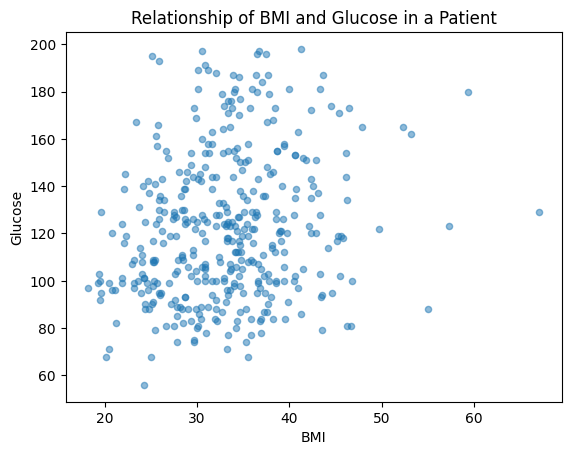

In [32]:
# Data Visualization
glucose_bmi.plot.scatter(x='BMI', y='Glucose', alpha=0.5)
plt.title('Relationship of BMI and Glucose in a Patient')
plt.show()

- Explanation: The scatterplot results show a weak positive correlation between BMI and Glucose with the value of `0.209572`, signifying that their influence on each other is very small.

Relationship between BMI and Insulin:

In [33]:
# Display Columns
insulin_bmi = df[['Insulin', 'BMI']]
insulin_bmi

,Insulin,BMI
3,94,28.1
4,168,43.1
6,88,31.0
8,543,30.5
13,846,30.1
...,...,...
753,510,43.3
755,110,36.5
760,16,28.4
763,180,32.9


In [34]:
# Display Measures of Central Tendency and Dispersion
insulin_bmi.describe()

,Insulin,BMI
count,394.000000,394.000000
mean,155.548223,33.072843
std,118.775855,7.015007
min,14.000000,18.200000
25%,76.250000,28.400000
50%,125.000000,33.200000
75%,190.000000,37.075000
max,846.000000,67.100000


In [35]:
median_insulin = insulin_bmi['Insulin'].median()
variance_insulin = insulin_bmi['Insulin'].var()

median_bmi = insulin_bmi['BMI'].median()
variance_bmi = insulin_bmi['BMI'].var()

result_table = pd.DataFrame({
    'Parameter': ['Median', 'Variance'],
    'Insulin': [median_insulin, variance_insulin],
    'BMI': [median_bmi, variance_bmi]
})

print(result_table)

  Parameter       Insulin        BMI
0    Median    125.000000  33.200000
1  Variance  14107.703775  49.210329


In [36]:
# Display Correlation
insulin_bmi.corr()

,Insulin,BMI
Insulin,1.000000,0.227933
BMI,0.227933,1.000000


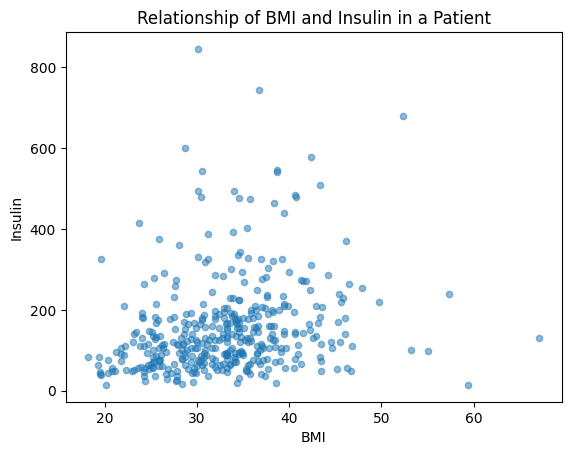

In [37]:
# Data Visualization
insulin_bmi.plot.scatter(x='BMI', y='Insulin', alpha=0.5)
plt.title('Relationship of BMI and Insulin in a Patient')
plt.show()

- Explanation: From the results of the scatterplot, BMI and Insulin has a very weak positive correlation (`0.227933`), signifying that there isn't a close connection between them.


Based on the numerical summaries and visualization, we can see that there is little to no relationship of Insulin and Glocuse, in regards to the BMI.

###   Is there a relationship between `Glucose` and the Diabetes `Outcome`?

To answer this question, the variables of interest are:
- **`Glucose`**: Glucose levels in blood
- **`Outcome`**: Expression if diabetes was confirmed (1) or not (0)

In [38]:
# Display Measures of Central Tendency and Dispersion of Glucose for (Outcome 1)
glucose_outcome_1 = df[df['Outcome'] == 1][['Glucose']]

glucose_outcome_1.describe()

,Glucose
count,130.000000
mean,145.192308
std,29.839388
min,78.000000
25%,124.250000
50%,144.500000
75%,171.750000
max,198.000000


In [39]:
# Median and Variance of Glucose for (Outcome 1)
median_glucose_outcome_1 = glucose_outcome_1['Glucose'].median()
variance_glucose_outcome_1 = glucose_outcome_1['Glucose'].var()

result_table = pd.DataFrame({
    'Parameter': ['Median', 'Variance'],
    'Glucose': [median_glucose_outcome_1, variance_glucose_outcome_1],
})

print(result_table)

  Parameter     Glucose
0    Median  144.500000
1  Variance  890.389088


In [40]:
# Display Measures of Central Tendency and Dispersion of Glucose for (Outcome 0)
glucose_outcome_0 = df[df['Outcome'] == 0][['Glucose']]

glucose_outcome_0.describe()

,Glucose
count,264.000000
mean,111.484848
std,24.555976
min,56.000000
25%,94.000000
50%,108.000000
75%,126.000000
max,197.000000


In [41]:
# Median and Variance of Glucose for (Outcome 0)
median_glucose_outcome_0 = glucose_outcome_0['Glucose'].median()
variance_glucose_outcome_0 = glucose_outcome_0['Glucose'].var()

result_table = pd.DataFrame({
    'Parameter': ['Median', 'Variance'],
    'Glucose': [median_glucose_outcome_0, variance_glucose_outcome_0],
})

print(result_table)

  Parameter     Glucose
0    Median  108.000000
1  Variance  602.995967


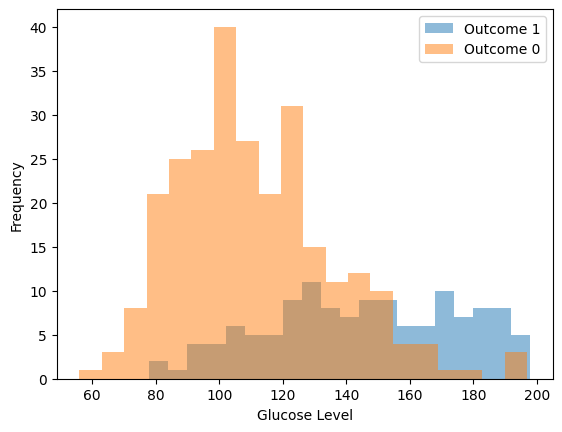

In [42]:
# Data Visualization
plt.hist(df[df['Outcome'] == 1]['Glucose'], alpha=0.5, label='Outcome 1', bins=20)
plt.hist(df[df['Outcome'] == 0]['Glucose'], alpha=0.5, label='Outcome 0', bins=20)
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')
plt.legend()
plt.show()

- Explanation: From the histogram, it appears that patients without diabetes (Outcome 0) had lower glucose level as compared to patients with diabetes (Outcome 1). Within our data, we can see this by the fact that the frequency of patient without diabetes (Outcome 0), glucose level primarily ranging from 60 - 140, was much higher than the frequency of patients with diabetes (Outcome 1). It also appears that as the glucose level increased the frequency of patients with diabetes (Outcome 1) was significantly higher than those without it as can be primarily seen in ranges from 160-180.

### Is there a relationship between `BMI` and Diabetes `Outcome`?

To answer this question, the variables of interest are:
- **`BMI`**: To express the Body mass index
- **`Outcome`**: Expression if diabetes was confirmed (1) or not (0)

In [43]:
# Display Measures of Central Tendency and Dispersion
bmi_outcome_1 = df[df['Outcome'] == 1][['BMI']]

bmi_outcome_1.describe()

,BMI
count,130.000000
mean,35.777692
std,6.734687
min,22.900000
25%,31.600000
50%,34.600000
75%,38.350000
max,67.100000


In [44]:
#BMI For Outcome 1 (Diabetic Patients)
median_bmi_outcome_1 = bmi_outcome_1['BMI'].median()
variance_bmi_outcome_1 = bmi_outcome_1['BMI'].var()

result_table = pd.DataFrame({
    'Parameter': ['Median', 'Variance'],
    'BMI': [median_bmi_outcome_1, variance_bmi_outcome_1],
})

print(result_table)

  Parameter       BMI
0    Median  34.60000
1  Variance  45.35601


In [45]:
bmi_outcome_0 = df[df['Outcome'] == 0][['BMI']]

bmi_outcome_0.describe()

,BMI
count,264.000000
mean,31.740909
std,6.774274
min,18.200000
25%,26.175000
50%,31.250000
75%,36.100000
max,57.300000


In [46]:
#BMI For Outcome 0 (Non-Diabetic Patients)
median_bmi_outcome_0 = bmi_outcome_0['BMI'].median()
variance_bmi_outcome_0 = bmi_outcome_0['BMI'].var()

result_table = pd.DataFrame({
    'Parameter': ['Median', 'Variance'],
    'BMI': [median_bmi_outcome_0, variance_bmi_outcome_0],
})

print(result_table)

  Parameter        BMI
0    Median  31.250000
1  Variance  45.890792


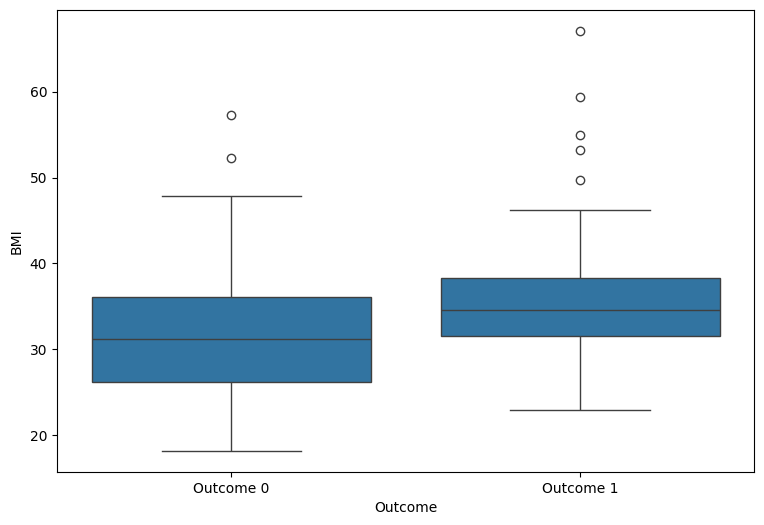

In [47]:
# Data Visualization
plt.figure(figsize=(9, 6))
sns.boxplot(x='Outcome', y='BMI', data=df)
plt.ylabel('BMI')
plt.xticks([0, 1], ['Outcome 0', 'Outcome 1'])
plt.show()

- Explanation: From the boxplot, we can see the average BMI of non-diabetic patients (Outcome 0) was lower than that of diabetic patients (Outcome 1). Also, there appears to be more outliers in Outcome 1. From the data, we can see that the avg BMI is 31.7 (Outcome 0) as compared to a diabetic patient (Outcome 1) 35.7. Upon referencing the BMI index, the average BMI of non-diabetic patients would fall under Obese Class I and diabetic patients would fall under Obese Class II.

### Is there a relationship between `Pregnancies` and Diabetes `Outcome`?

To answer this question, the variables of interest are:
- **`Pregnancies`**: To express the Number of pregnancies
- **`Outcome`**: Expression if diabetes was confirmed (1) or not (0)

In [48]:
# Display Measures of Central Tendency and Dispersion
pregnancies_outcome_1 = df[df['Outcome'] == 1][['Pregnancies']]

pregnancies_outcome_1.describe()

,Pregnancies
count,130.000000
mean,4.469231
std,3.916153
min,0.000000
25%,1.000000
50%,3.000000
75%,7.000000
max,17.000000


In [49]:
#Pregnancies For Outcome 1 (Diabetic Patients)
median_pregnancies_outcome_1 = pregnancies_outcome_1['Pregnancies'].median()
variance_pregnancies_outcome_1 = pregnancies_outcome_1['Pregnancies'].var()

result_table = pd.DataFrame({
    'Parameter': ['Median', 'Variance'],
    'Pregnancies': [median_pregnancies_outcome_1, variance_pregnancies_outcome_1],
})

print(result_table)

  Parameter  Pregnancies
0    Median     3.000000
1  Variance    15.336255


In [50]:
pregnancies_outcome_0 = df[df['Outcome'] == 0][['Pregnancies']]

pregnancies_outcome_0.describe()

,Pregnancies
count,264.000000
mean,2.704545
std,2.615364
min,0.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,13.000000


In [51]:
#Pregnancies For Outcome 0 (Diabetic Patients)
median_pregnancies_outcome_0 = pregnancies_outcome_0['Pregnancies'].median()
variance_pregnancies_outcome_0 = pregnancies_outcome_0['Pregnancies'].var()

result_table = pd.DataFrame({
    'Parameter': ['Median', 'Variance'],
    'Pregnancies': [median_pregnancies_outcome_0, variance_pregnancies_outcome_0],
})

print(result_table)

  Parameter  Pregnancies
0    Median     2.000000
1  Variance     6.840131


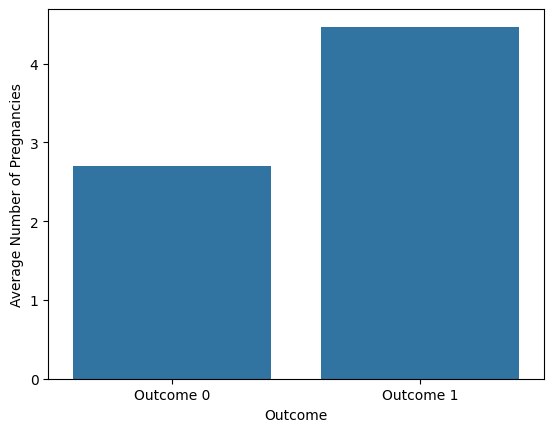

In [52]:
# Data Visualization
sns.barplot(x='Outcome', y='Pregnancies', data=df, errorbar=None)
plt.ylabel('Average Number of Pregnancies')
plt.xticks([0, 1], ['Outcome 0', 'Outcome 1'])
plt.show()

- Explanation: From the barplot, we can observe that the average number of pregnancies of non-diabetic patients (Outcome 0) is less than the diabetic patients (Outcome 1). The average number of pregnancies of non-diabetic patients (Outcome 0) is 2.7 while for the diabetic patients (Outcome 1) it is 4.46.

###   Is there a relationship between `Glucose` and `Insulin`, in regards to the `Outcome`?

To answer this question, the variables of interest are:
- **`Glucose`**: Glucose levels in blood
- **`Insulin`**: Insulin levels in blood
- **`Outcome`**: Expression if diabetes was confirmed (1) or not (0)

Their relationship if the patient has no Diabetes:

In [53]:
# Display Columns
glucose_insulin_0 = df[df['Outcome'] == 0][['Glucose', 'Insulin']]
glucose_insulin_0

,Glucose,Insulin
3,89,94
18,103,83
20,126,235
27,97,140
28,145,110
...,...,...
747,81,57
751,121,74
760,88,16
763,101,180


In [54]:
# Display Measures of Central Tendency and Dispersion
glucose_insulin_0.describe()

,Glucose,Insulin
count,264.000000,264.000000
mean,111.484848,130.287879
std,24.555976,102.482237
min,56.000000,15.000000
25%,94.000000,66.000000
50%,108.000000,102.500000
75%,126.000000,161.250000
max,197.000000,744.000000


In [55]:
median_glucose = glucose_insulin_0['Glucose'].median()
variance_glucose = glucose_insulin_0['Glucose'].var()

median_insulin = glucose_insulin_0['Insulin'].median()
variance_insulin = glucose_insulin_0['Insulin'].var()

result_table = pd.DataFrame({
    'Parameter': ['Median', 'Variance'],
    'Glucose': [median_glucose, variance_glucose],
    'Insulin': [median_insulin, variance_insulin]
})

print(result_table)

  Parameter     Glucose       Insulin
0    Median  108.000000    102.500000
1  Variance  602.995967  10502.608826


In [56]:
# Display Correlation
glucose_insulin_0.corr()

,Glucose,Insulin
Glucose,1.000000,0.613679
Insulin,0.613679,1.000000


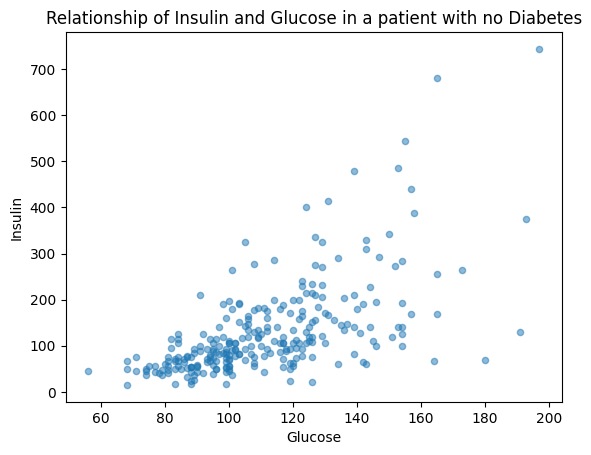

In [57]:
# Data Visualization
glucose_insulin_0.plot.scatter(x='Glucose', y='Insulin', alpha=0.5)
plt.title('Relationship of Insulin and Glucose in a patient with no Diabetes')
plt.show()

- From this graph and the correlation coefficient of `0.613679` being above 0, an averagely strong positive correlation is shown between Insulin and Glucose, as their levels increase according to the other. This means that for patients with no diabetes, their glucose levels match their insulin levels as they consume food.

Their relationship if the patient has Diabetes:

In [58]:
# Display Columns
glucose_insulin_1 = df[df['Outcome'] == 1][['Glucose', 'Insulin']]
glucose_insulin_1

,Glucose,Insulin
4,137,168
6,78,88
8,197,543
13,189,846
14,166,175
...,...,...
732,174,120
740,120,150
748,187,200
753,181,510


In [59]:
# Display Measures of Central Tendency and Dispersion
glucose_insulin_1.describe()

,Glucose,Insulin
count,130.000000,130.000000
mean,145.192308,206.846154
std,29.839388,132.699898
min,78.000000,14.000000
25%,124.250000,127.500000
50%,144.500000,169.500000
75%,171.750000,239.250000
max,198.000000,846.000000


In [60]:
median_glucose = glucose_insulin_1['Glucose'].median()
variance_glucose = glucose_insulin_1['Glucose'].var()

median_insulin = glucose_insulin_1['Insulin'].median()
variance_insulin = glucose_insulin_1['Insulin'].var()

result_table = pd.DataFrame({
    'Parameter': ['Median', 'Variance'],
    'Glucose': [median_glucose, variance_glucose],
    'Insulin': [median_insulin, variance_insulin]
})

print(result_table)

  Parameter     Glucose      Insulin
0    Median  144.500000    169.50000
1  Variance  890.389088  17609.26297


In [61]:
# Display Correlation
glucose_insulin_1.corr()

,Glucose,Insulin
Glucose,1.000000,0.398039
Insulin,0.398039,1.000000


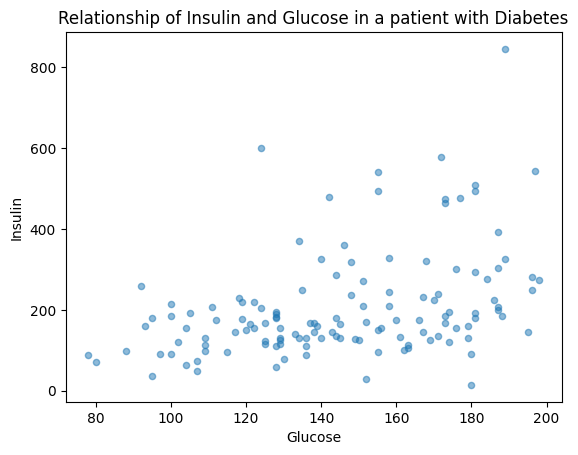

In [62]:
# Data Visualization
glucose_insulin_1.plot.scatter(x='Glucose', y='Insulin', alpha=0.5)
plt.title('Relationship of Insulin and Glucose in a patient with Diabetes')
plt.show()

- Due to their correlation coefficient of `0.398039` being positive and that most points in the graph are moving upwards, a below-average positive correlation is present between Insulin and Glucose of patients with diabetes. This means that their insulin levels in their bloodstream rise in accordance with their glucose levels.

Direct Comparison:

In [63]:
# Display Columns
GIO = df[['Glucose', 'Insulin', 'Outcome']]
GIO

,Glucose,Insulin,Outcome
3,89,94,0
4,137,168,1
6,78,88,1
8,197,543,1
13,189,846,1
...,...,...,...
753,181,510,1
755,128,110,1
760,88,16,0
763,101,180,0


In [64]:
# Display Measures of Central Tendency and Dispersion
GIO.describe()

,Glucose,Insulin,Outcome
count,394.000000,394.000000,394.000000
mean,122.606599,155.548223,0.329949
std,30.783576,118.775855,0.470792
min,56.000000,14.000000,0.000000
25%,99.000000,76.250000,0.000000
50%,119.000000,125.000000,0.000000
75%,143.000000,190.000000,1.000000
max,198.000000,846.000000,1.000000


In [65]:
GIO_0 = GIO[GIO['Outcome'] == 0][['Glucose', 'Insulin']]
GIO_1 = GIO[GIO['Outcome'] == 1][['Glucose', 'Insulin']]

median_glucose_0 = GIO_0['Glucose'].median()
variance_glucose_0 = GIO_0['Glucose'].var()
median_insulin_0 = GIO_0['Insulin'].median()
variance_insulin_0 = GIO_0['Insulin'].var()

median_glucose_1 = GIO_1['Glucose'].median()
variance_glucose_1 = GIO_1['Glucose'].var()
median_insulin_1 = GIO_1['Insulin'].median()
variance_insulin_1 = GIO_1['Insulin'].var()

result_table = pd.DataFrame({
    'Parameter': ['Median', 'Variance'],
    'Glucose (0)': [median_glucose_0, variance_glucose_0],
    'Insulin (0)': [median_insulin_0, variance_insulin_0],
    'Glucose (1)': [median_glucose_1, variance_glucose_1],
    'Insulin (1)': [median_insulin_1, variance_insulin_1]
})

print(result_table)

  Parameter  Glucose (0)   Insulin (0)  Glucose (1)  Insulin (1)
0    Median   108.000000    102.500000   144.500000    169.50000
1  Variance   602.995967  10502.608826   890.389088  17609.26297


In [66]:
# Display Correlation
GIO.corr()

,Glucose,Insulin,Outcome
Glucose,1.000000,0.580586,0.515509
Insulin,0.580586,1.000000,0.303454
Outcome,0.515509,0.303454,1.000000


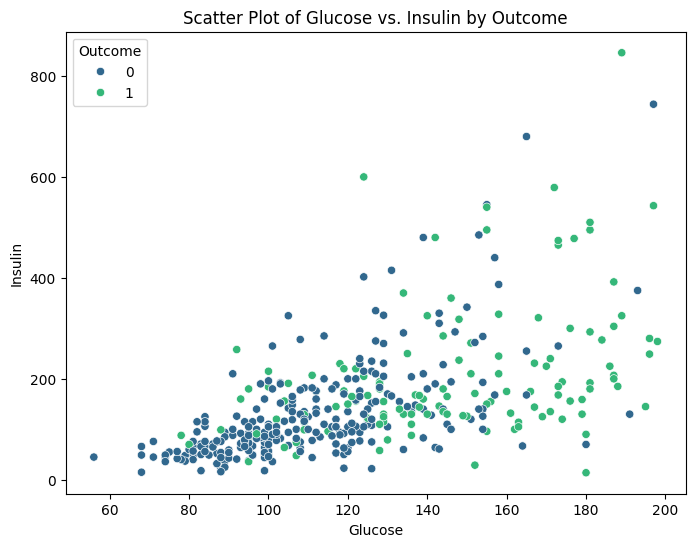

In [67]:
# Data Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Glucose', y='Insulin', hue='Outcome', data=df, palette='viridis')
plt.title("Scatter Plot of Glucose vs. Insulin by Outcome")
plt.show()

- From this combined graph, we see that patients with no diabetes have a higher positive correlation than those with it. A possible conclusion from this is that patients with diabetes have far more unique cases when considering their glucose and insulin levels. However it is worth noting that in the chart, patients with diabetes seem to have more insulin and glucose in their bloodstream, than those who don't have diabetes.

## Research Question

### **What would be the ideal BMI range for pregnant women to minimize the risk of developing diabetes?**

#### Connection of Research Question to EDA

Throughout the various EDA’ we wanted to find factors that affect the outcome of having diabetes or not and a certain population or group of people that our research would be useful for. After various different tests, we decided to utilize the data we have on pregnancies, due to the innate nature of our data set, specifically the location and society it was acquired from. Ultimately, we decided to focus on BMI as a large factor, a popular measurement of health used throughout the world, after realising that some bodily factors such as Insulin or Glucose may not have as much controllable correlation to diabetes than we initially expected and the lengthy procedure it takes to have them measured to begin with.

From the BMI related EDA result, we observed that the average BMI was higher for the non-diabetic patient (Outcome 0) as compared to a diabetic patient (Outcome 1). This initial observation indicated a potential link between BMI and diabetes risk. Our exploratory data analysis did expose us to  a spectrum of BMIs  to certain extent within the dataset for the diabetic and the non diabetic patients from the visualization via the boxplot. We wanted to explore more on this and thus aimed to identify the and BMI range that could serve as a preventive measure against diabetes among pregnant women in this particular region.

#### Importance and Significance

The research question is aimed at identifying the optimal BMI range for pregnant women to reduce their risk of developing diabetes. It's scope  has the potential to go beyond the realm of individual well-being and can extend to broader societal implications in attempting to  addresses a critical facet of preventive healthcare, emphasizing the importance of early intervention in reducing the incidence of diabetes during pregnancy. Diabetes, is a major public health concern, affecting millions worldwide and carrying substantial healthcare costs. Focusing on pregnant women, who represent a vulnerable population, underscores the timeliness and relevance of the research question. Additionally, as the prevalence of obesity and diabetes continues to rise, understanding the relationship between BMI and diabetes risk is of utmost importance for healthcare providers and policymakers. 

If the study uncovers an optimal BMI range that significantly lowers the risk of diabetes, it can inform targeted healthcare interventions and public health campaigns aimed at promoting healthy weight management for pregnant women. By doing so, we can potentially reduce the burden on healthcare systems, enhance maternal and child health outcomes, and contribute to the overall well-being of future generations.
Conversely, if the research does not find a significant relationship, this too is a valuable outcome, as it will help dispel any potential misconceptions about the direct link between BMI and diabetes risk in pregnant women, prompting further investigations and a more nuanced approach to maternal health.

#### Data Mining Technique

A possible data mining technique this research could utilize would be Association Rule Mining, since it can identify patterns of co-occurrence or dependencies between variables, making it useful for finding relationships. Through this, we could find possible factors that could affect the risk of developing diabetes from the various factors within the data set, such as BMI, a representation of health, or the various other body factors, such as Age, Glucose, or Insulin. Furthermore, techniques like clustering, logistic regression, or decision tree among other can also be used to explore this question.

### PHASE 2

Filtering the Pregnant Women from the Data


In [68]:
WomenPreg = df[df['Pregnancies'] >= 1]

In [69]:
WomenPreg.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,94,28.1,0.167,21,0
6,3,78,50,88,31.0,0.248,26,1
8,2,197,70,543,30.5,0.158,53,1
13,1,189,60,846,30.1,0.398,59,1
14,5,166,72,175,25.8,0.587,51,1


In [70]:
WomenPreg.tail()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
751,1,121,78,74,39.0,0.261,28,0
755,1,128,88,110,36.5,1.057,37,1
760,2,88,58,16,28.4,0.766,22,0
763,10,101,76,180,32.9,0.171,63,0
765,5,121,72,112,26.2,0.245,30,0


In [71]:
WomenPreg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 337 entries, 3 to 765
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               337 non-null    int64  
 1   Glucose                   337 non-null    int64  
 2   BloodPressure             337 non-null    int64  
 3   Insulin                   337 non-null    int64  
 4   BMI                       337 non-null    float64
 5   DiabetesPedigreeFunction  337 non-null    float64
 6   Age                       337 non-null    int64  
 7   Outcome                   337 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 23.7 KB


In [82]:
from sklearn.preprocessing import StandardScaler, LabelEncoder


selected_columns = ['BMI', 'Outcome']
selected_data = WomenPreg[selected_columns]

In [86]:
NonDiabeticPregnantWomen = WomenPreg[WomenPreg['Outcome'] == 0]


In [87]:
NonDiabeticPregnantWomen.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,94,28.1,0.167,21,0
18,1,103,30,83,43.3,0.183,33,0
20,3,126,88,235,39.3,0.704,27,0
27,1,97,66,140,23.2,0.487,22,0
28,13,145,82,110,22.2,0.245,57,0


In [88]:
NonDiabeticPregnantWomen.tail()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
747,1,81,74,57,46.3,1.096,32,0
751,1,121,78,74,39.0,0.261,28,0
760,2,88,58,16,28.4,0.766,22,0
763,10,101,76,180,32.9,0.171,63,0
765,5,121,72,112,26.2,0.245,30,0


In [89]:
NonDiabeticPregnantWomen.info()

<class 'pandas.core.frame.DataFrame'>
Index: 226 entries, 3 to 765
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               226 non-null    int64  
 1   Glucose                   226 non-null    int64  
 2   BloodPressure             226 non-null    int64  
 3   Insulin                   226 non-null    int64  
 4   BMI                       226 non-null    float64
 5   DiabetesPedigreeFunction  226 non-null    float64
 6   Age                       226 non-null    int64  
 7   Outcome                   226 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 15.9 KB


In [90]:
DiabeticPregnantWomen = WomenPreg[WomenPreg['Outcome'] == 1]

In [92]:
DiabeticPregnantWomen.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
6,3,78,50,88,31.0,0.248,26,1
8,2,197,70,543,30.5,0.158,53,1
13,1,189,60,846,30.1,0.398,59,1
14,5,166,72,175,25.8,0.587,51,1
19,1,115,70,96,34.6,0.529,32,1


In [93]:
DiabeticPregnantWomen.tail()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
730,3,130,78,79,28.4,0.323,34,1
732,2,174,88,120,44.5,0.646,24,1
740,11,120,80,150,42.3,0.785,48,1
748,3,187,70,200,36.4,0.408,36,1
755,1,128,88,110,36.5,1.057,37,1


In [94]:
DiabeticPregnantWomen.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111 entries, 6 to 755
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               111 non-null    int64  
 1   Glucose                   111 non-null    int64  
 2   BloodPressure             111 non-null    int64  
 3   Insulin                   111 non-null    int64  
 4   BMI                       111 non-null    float64
 5   DiabetesPedigreeFunction  111 non-null    float64
 6   Age                       111 non-null    int64  
 7   Outcome                   111 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 7.8 KB


In [115]:
'''
# Histogram of BMI in Pregnant Women
plt.hist(scaled_df['BMI'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Distribution of BMI in Pregnant Women')
plt.show()
'''

"\n# Histogram of BMI in Pregnant Women\nplt.hist(scaled_df['BMI'], bins=30, color='skyblue', edgecolor='black')\nplt.xlabel('BMI')\nplt.ylabel('Frequency')\nplt.title('Distribution of BMI in Pregnant Women')\nplt.show()\n"

C:\Users\63945\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\63945\AppData\Local\Temp\ipykernel_4676\3786104010.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NonDiabeticPregnantWomen['Cluster'] = hc_non_diabetic.fit_predict(NonDiabeticPregnantWomen[['BMI', 'Glucose']])
C:\Users\63945\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\63945\AppData\Local\Temp\ipykernel_4676\3786104010.py:

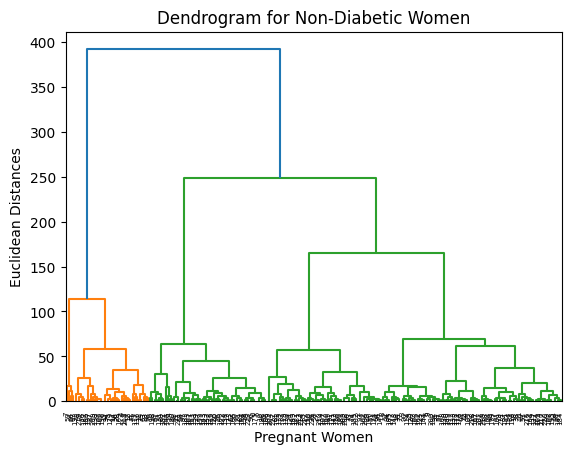

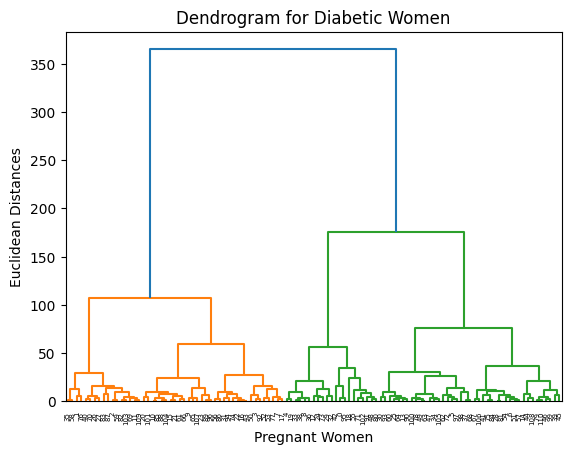

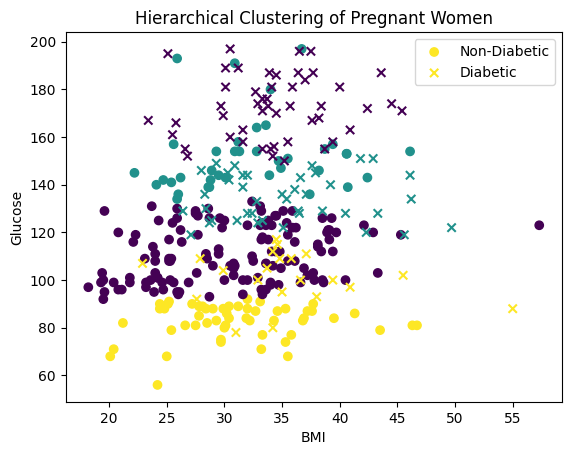

In [125]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Select relevant columns
selected_columns = ['BMI', 'Outcome', 'Glucose']
selected_data = WomenPreg[selected_columns]

# Separate data for non-diabetic and diabetic pregnant women
NonDiabeticPregnantWomen = selected_data[selected_data['Outcome'] == 0]
DiabeticPregnantWomen = selected_data[selected_data['Outcome'] == 1]

# Perform hierarchical clustering for non-diabetic women
hc_non_diabetic = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
NonDiabeticPregnantWomen['Cluster'] = hc_non_diabetic.fit_predict(NonDiabeticPregnantWomen[['BMI', 'Glucose']])

# Perform hierarchical clustering for diabetic women
hc_diabetic = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
DiabeticPregnantWomen['Cluster'] = hc_diabetic.fit_predict(DiabeticPregnantWomen[['BMI', 'Glucose']])

# Visualize the clusters using a dendrogram for non-diabetic women
dendrogram_non_diabetic = sch.dendrogram(sch.linkage(NonDiabeticPregnantWomen[['BMI', 'Glucose']], method='ward'))
plt.title('Dendrogram for Non-Diabetic Women')
plt.xlabel('Pregnant Women')
plt.ylabel('Euclidean Distances')
plt.show()

# Visualize the clusters using a dendrogram for diabetic women
dendrogram_diabetic = sch.dendrogram(sch.linkage(DiabeticPregnantWomen[['BMI', 'Glucose']], method='ward'))
plt.title('Dendrogram for Diabetic Women')
plt.xlabel('Pregnant Women')
plt.ylabel('Euclidean Distances')
plt.show()

# Visualize the clusters
plt.scatter(NonDiabeticPregnantWomen['BMI'], NonDiabeticPregnantWomen['Glucose'], c=NonDiabeticPregnantWomen['Cluster'], cmap='viridis', label='Non-Diabetic')
plt.scatter(DiabeticPregnantWomen['BMI'], DiabeticPregnantWomen['Glucose'], c=DiabeticPregnantWomen['Cluster'], cmap='viridis', marker='x', label='Diabetic')
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.title('Hierarchical Clustering of Pregnant Women')
plt.legend()
plt.show()


In [127]:
# Function to get numerical information about clusters
def get_cluster_stats(data, cluster_column):
    cluster_stats = data.groupby(cluster_column).agg({'BMI': ['mean', 'std', 'count']})
    cluster_stats.columns = ['BMI_mean', 'BMI_std', 'Count']
    return cluster_stats

# Get cluster stats for non-diabetic women
non_diabetic_cluster_stats = get_cluster_stats(NonDiabeticPregnantWomen, 'Cluster')

# Get cluster stats for diabetic women
diabetic_cluster_stats = get_cluster_stats(DiabeticPregnantWomen, 'Cluster')

# Display cluster stats
print("Cluster Stats for Non-Diabetic Women:")
print(non_diabetic_cluster_stats)

print("\nCluster Stats for Diabetic Women:")
print(diabetic_cluster_stats)


Cluster Stats for Non-Diabetic Women:
          BMI_mean   BMI_std  Count
Cluster                            
0        30.601493  6.608482    134
1        32.294737  5.834054     38
2        31.235185  5.941195     54

Cluster Stats for Diabetic Women:
          BMI_mean   BMI_std  Count
Cluster                            
0        34.232653  4.988795     49
1        35.273171  5.939782     41
2        35.309524  6.634901     21


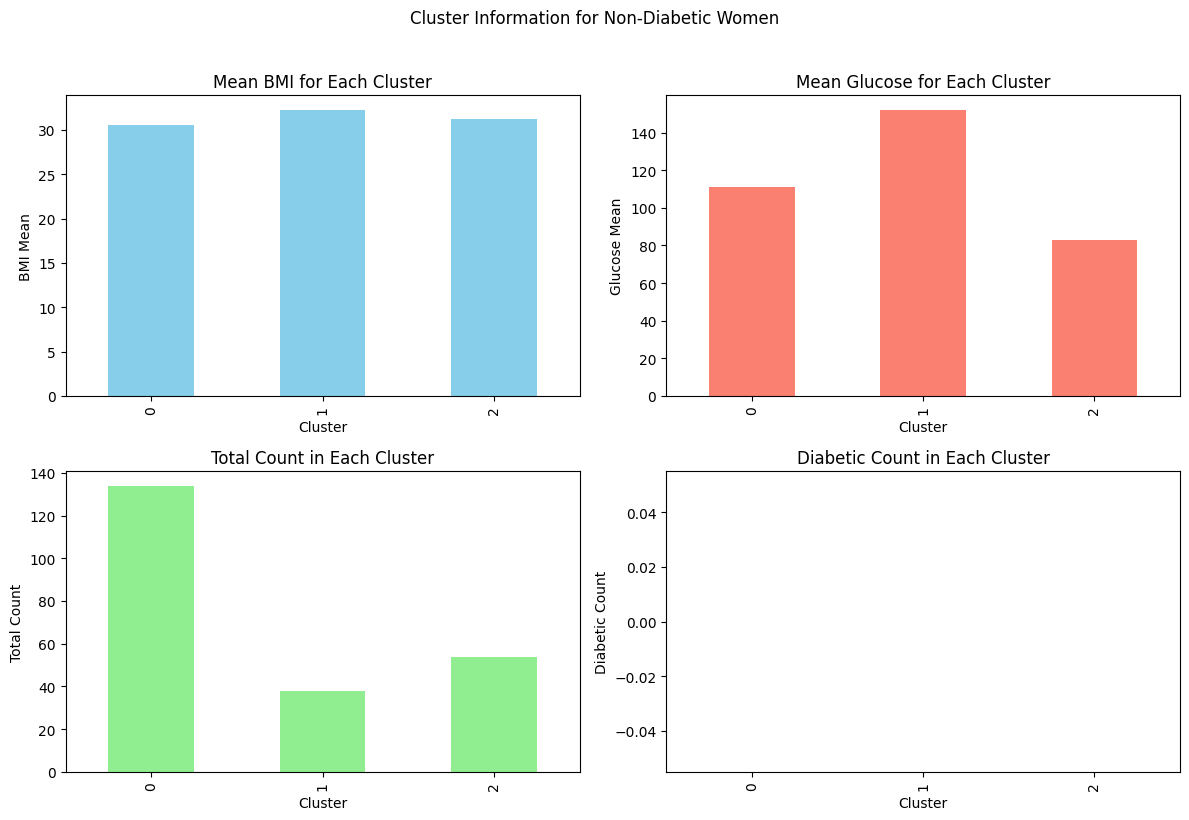

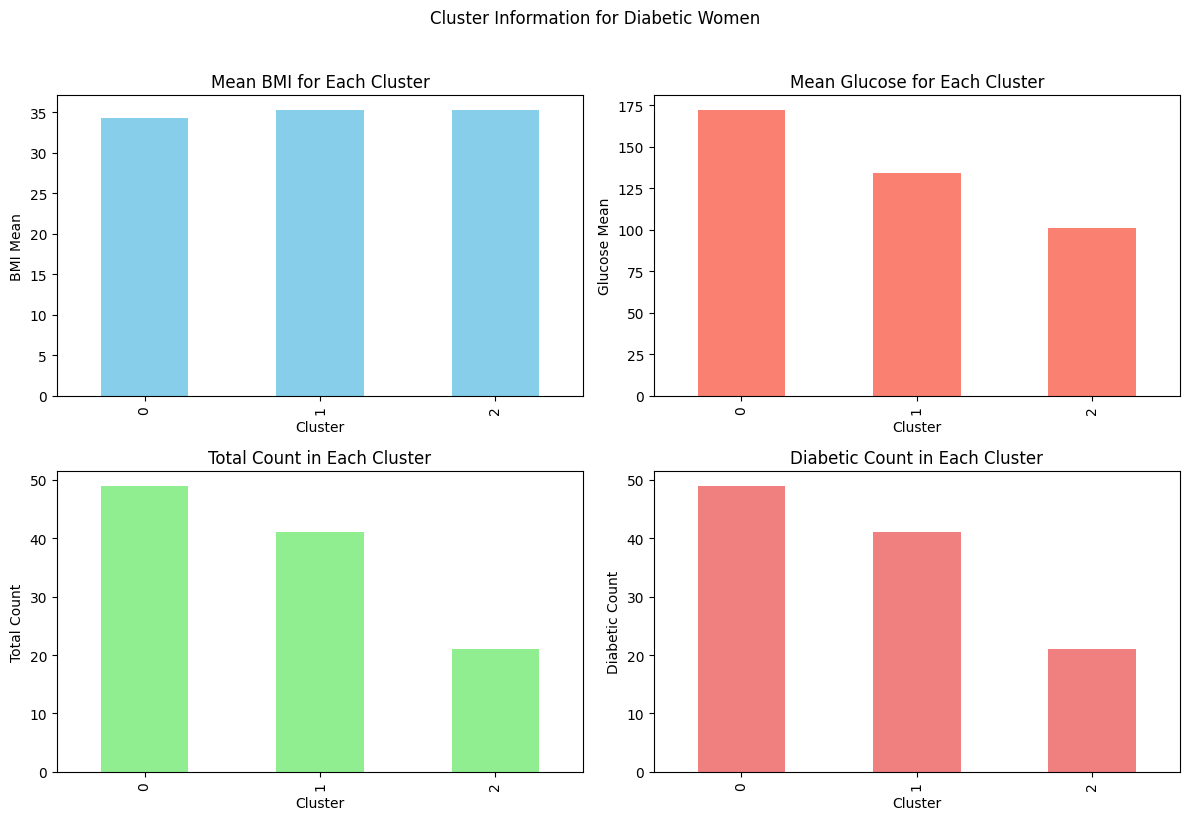

In [129]:
# Function to create a bar plot for cluster information
def plot_cluster_info(cluster_info, title):
    plt.figure(figsize=(12, 8))

    # Bar plot for BMI mean
    plt.subplot(2, 2, 1)
    cluster_info['BMI_mean'].plot(kind='bar', color='skyblue')
    plt.title('Mean BMI for Each Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('BMI Mean')

    # Bar plot for Glucose mean
    plt.subplot(2, 2, 2)
    cluster_info['Glucose_mean'].plot(kind='bar', color='salmon')
    plt.title('Mean Glucose for Each Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Glucose Mean')

    # Bar plot for total count
    plt.subplot(2, 2, 3)
    cluster_info['Total_count'].plot(kind='bar', color='lightgreen')
    plt.title('Total Count in Each Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Total Count')

    # Bar plot for diabetic count
    plt.subplot(2, 2, 4)
    cluster_info['Diabetic_count'].plot(kind='bar', color='lightcoral')
    plt.title('Diabetic Count in Each Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Diabetic Count')

    plt.suptitle(title, y=1.02)
    plt.tight_layout()
    plt.show()

# Plotting cluster information for non-diabetic women
plot_cluster_info(cluster_info_non_diabetic, 'Cluster Information for Non-Diabetic Women')

# Plotting cluster information for diabetic women
plot_cluster_info(cluster_info_diabetic, 'Cluster Information for Diabetic Women')

# ## ANOTHER METHOD

C:\Users\63945\AppData\Local\Temp\ipykernel_4676\1616233299.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NonDiabeticPregnantWomen['Cluster'] = dbscan_non_diabetic.fit_predict(scaled_data_non_diabetic)
C:\Users\63945\AppData\Local\Temp\ipykernel_4676\1616233299.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DiabeticPregnantWomen['Cluster'] = dbscan_diabetic.fit_predict(scaled_data_diabetic)


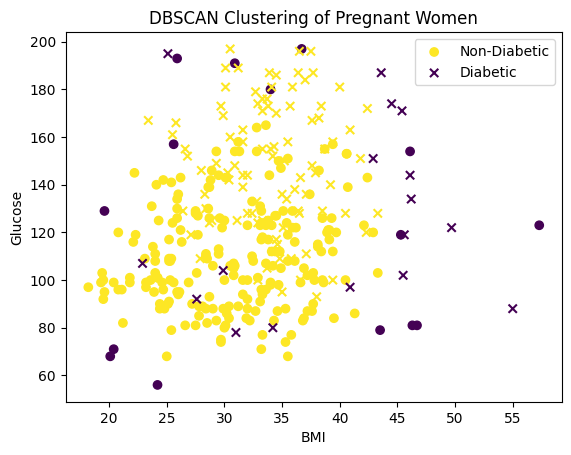

In [130]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Select relevant columns
selected_columns = ['BMI', 'Outcome', 'Glucose']
selected_data = WomenPreg[selected_columns]

# Separate data for non-diabetic and diabetic pregnant women
NonDiabeticPregnantWomen = selected_data[selected_data['Outcome'] == 0]
DiabeticPregnantWomen = selected_data[selected_data['Outcome'] == 1]

# Standardize the features
scaler = StandardScaler()
scaled_data_non_diabetic = scaler.fit_transform(NonDiabeticPregnantWomen[['BMI', 'Glucose']])
scaled_data_diabetic = scaler.fit_transform(DiabeticPregnantWomen[['BMI', 'Glucose']])

# Perform DBSCAN clustering for non-diabetic women
dbscan_non_diabetic = DBSCAN(eps=0.5, min_samples=5)
NonDiabeticPregnantWomen['Cluster'] = dbscan_non_diabetic.fit_predict(scaled_data_non_diabetic)

# Perform DBSCAN clustering for diabetic women
dbscan_diabetic = DBSCAN(eps=0.5, min_samples=5)
DiabeticPregnantWomen['Cluster'] = dbscan_diabetic.fit_predict(scaled_data_diabetic)

# Visualize the clusters
plt.scatter(NonDiabeticPregnantWomen['BMI'], NonDiabeticPregnantWomen['Glucose'], c=NonDiabeticPregnantWomen['Cluster'], cmap='viridis', label='Non-Diabetic')
plt.scatter(DiabeticPregnantWomen['BMI'], DiabeticPregnantWomen['Glucose'], c=DiabeticPregnantWomen['Cluster'], cmap='viridis', marker='x', label='Diabetic')
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.title('DBSCAN Clustering of Pregnant Women')
plt.legend()
plt.show()

# Associate Rule Mining